<a href="https://colab.research.google.com/github/mfmceneaney/DIRC_COLAB/blob/master/plot_dirc_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print(" > Installing uproot...")
!pip install uproot

 > Installing uproot...
     |████████████████████████████████| 122kB 2.8MB/s 
     |████████████████████████████████| 92kB 11.6MB/s 


In [0]:
import uproot

# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

# Import keras and tensorflow
import keras
import tensorflow

# The digits dataset
#digits = datasets.load_digits()
#print(digits.data)

#Display the first digit
#plt.figure(1, figsize=(3, 3))
#plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
#plt.show()

from google.colab import drive
drive.mount('/content/gdrive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#import os
#print( os.getcwd() )
#print( os.listdir() )
#print( os.chdir('My Drive'))
#print( os.listdir() )



In [0]:
# initialize images
image_kplus = np.zeros(shape=(48,144))
image_piplus = np.zeros(shape=(48,144))
images_kplus = []
images_piplus = []
images_flat_kplus = []
images_flat_piplus = []

#h2_kplus = ROOT.TH2F("kplus","Hit Pattern K+; PixelRow; PixelCol",144,-0.5,143.5,48,-0.5,47.5)
#h2_piplus = ROOT.TH2F("piplus","Hit Pattern pi+; PixelRow; PixelCol",144,-0.5,143.5,48,-0.5,47.5)

# get data from files
print("Opening files")
piplus = uproot.open("/content/gdrive/My Drive/piplus_p3_theta4_flat.root")["dircml_flat"]
kplus = uproot.open("/content/gdrive/My Drive/kplus_p5_theta4_flat.root")["dircml_flat"]

# fill histogram with # photon hits
#plt.axis([0, 250, 0, 5000])
#plt.hist(NPixelsArr, 4000) #, 0, 100) #bins='auto')
#plt.title("Histogram with 'auto' bins")
#plt.show()

eventMax = 10000
eventCounter = 0

print("Filling image arrays")
# loop over kplus events
for (PixelTimes,PixelRows,PixelCols) in zip(kplus.array("PixelTime"),kplus.array("PixelRow"),kplus.array("PixelCol")):
    #print("event")
    image_single = np.zeros(shape=(48,144))
    
    # loop over pixels within event
    for (PixelTime,PixelRow,PixelCol) in zip(PixelTimes,PixelRows,PixelCols):
        #print("PixelTime,Row,Col = %f,%d,%d" % (PixelTime,PixelRow,PixelCol))
        image_kplus[PixelCol,PixelRow] += 1
        image_single[PixelCol,PixelRow] = PixelTime
        #h2_kplus.Fill(PixelRow,PixelCol)
    
    # after each event
    images_kplus.append(image_single)
    images_flat_kplus.append(np.reshape(image_single, 6912))
    
    eventCounter = eventCounter+1
    if eventCounter > eventMax:
        break

eventCounter = 0
        
# loop over piplus events
for (PixelTimes,PixelRows,PixelCols) in zip(piplus.array("PixelTime"),piplus.array("PixelRow"),piplus.array("PixelCol")):
    #print("event")
    image_single = np.zeros(shape=(48,144))
    
    # loop over pixels within event
    for (PixelTime,PixelRow,PixelCol) in zip(PixelTimes,PixelRows,PixelCols):
        #print("PixelTime,Row,Col = %f,%d,%d" % (PixelTime,PixelRow,PixelCol))
        image_piplus[PixelCol,PixelRow] += 1
        image_single[PixelCol,PixelRow] = PixelTime
        #h2_piplus.Fill(PixelRow,PixelCol)
    
    # after each event
    images_piplus.append(image_single)
    images_flat_piplus.append(np.reshape(image_single, 6912))
    
    eventCounter = eventCounter+1
    if eventCounter > eventMax:
        break

Opening files
Filling image arrays


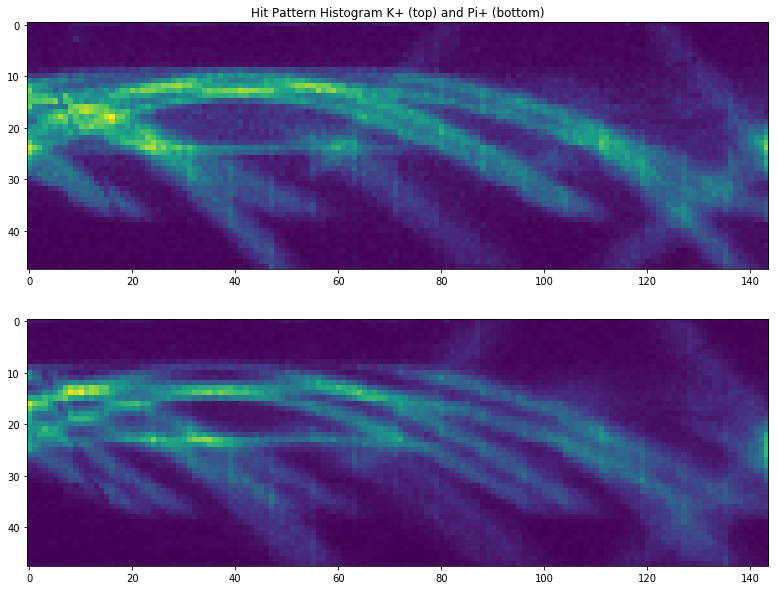

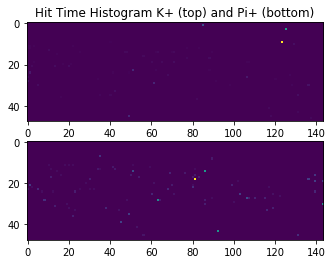

In [0]:
# draw cumulative image
plt.figure(figsize=(16,10))
plt.axis([-0.5, 143.5, -0.5, 47.5])
plt.subplot(2, 1, 1)
plt.title("Hit Pattern Histogram K+ (top) and Pi+ (bottom)")
plt.imshow(image_kplus, cmap='viridis')
plt.subplot(2, 1, 2)
plt.title("")
plt.imshow(image_piplus, cmap='viridis')
plt.show()

# draw single event image
plt.subplot(2, 1, 1)
plt.title("Hit Time Histogram K+ (top) and Pi+ (bottom)")
plt.imshow(images_kplus[0], cmap='viridis')
plt.subplot(2, 1, 2)
plt.title("")
plt.imshow(images_piplus[0], cmap='viridis')
#plt.show()

# draw ROOT image
#can = ROOT.TCanvas("cc","cc",600,500)
#can.Divide(1,2)
#can.cd(1)
#h2_kplus.Draw("colz")
#can.cd(2)
#h2_piplus.Draw("colz")
#can.Print("HitPattern.png")

In [0]:
# Split samples into training and testing
print("Splitting sample into training and testing subsets")
split = 3
n_kplus = len(images_kplus)
n_piplus = len(images_piplus)
n_total = n_kplus + n_piplus

images_train_kplus = images_flat_kplus[:n_kplus // split]
images_train_piplus = images_flat_piplus[:n_piplus // split]
n_train_kplus = len(images_train_kplus)
n_train_piplus = len(images_train_piplus)
n_train_total = n_train_kplus + n_train_piplus

images_test_kplus = images_flat_kplus[n_kplus // split:]
images_test_piplus = images_flat_piplus[n_piplus // split:]
n_test_kplus = len(images_test_kplus)
n_test_piplus = len(images_test_piplus)
n_test_total = n_test_kplus + n_test_piplus

data_train = np.concatenate((images_train_kplus, images_train_piplus))
data_test = np.concatenate((images_test_kplus, images_test_piplus))
data = np.concatenate((images_kplus, images_piplus))

target_train = np.concatenate((np.ones(n_train_kplus), np.zeros(n_train_piplus)))
target_test = np.concatenate((np.ones(n_test_kplus), np.zeros(n_test_piplus)))
target = np.concatenate((np.ones(n_kplus), np.zeros(n_piplus)))

print(data.shape)
print(target.shape)
print(np.unique(target))
print("Training size = %d" % len(data_train))
print("Testing size = %d" % len(data_test))

Splitting sample into training and testing subsets
(20002, 48, 144)
(20002,)
[0. 1.]
Training size = 6666
Testing size = 13336


Fitting classifier 1
Evaluating classifier performance
Fitting classifier 2
Evaluating classifier performance
Fitting classifier 3
Evaluating classifier performance
Fitting classifier 4
Evaluating classifier performance
Fitting classifier 5
Evaluating classifier performance
Fitting classifier 6
Evaluating classifier performance
Fitting classifier 7
Evaluating classifier performance
Fitting classifier 8
Evaluating classifier performance
Fitting classifier 9
Evaluating classifier performance
Fitting classifier 10
Evaluating classifier performance


W0830 01:26:07.986631 139736069400448 legend.py:1289] No handles with labels found to put in legend.


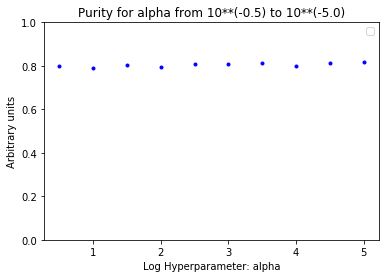

W0830 01:26:08.269057 139736069400448 legend.py:1289] No handles with labels found to put in legend.


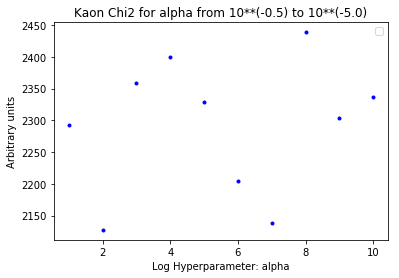

W0830 01:26:08.559400 139736069400448 legend.py:1289] No handles with labels found to put in legend.


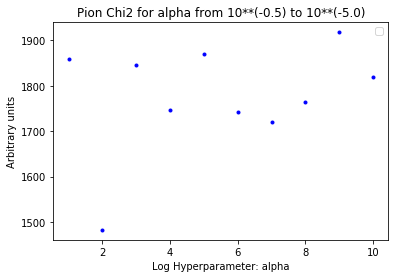

W0830 01:26:08.835968 139736069400448 legend.py:1289] No handles with labels found to put in legend.


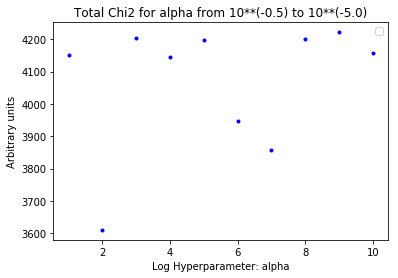

'\n###################  TensorFlow  #################\n\n# setup Keras NN layers(?)\nclassifier = keras.Sequential([keras.layers.Dense(128, activation=tensorflow.nn.relu), keras.layers.Dense(2, activation=tensorflow.nn.softmax)]) # keras.layers.Flatten(input_shape=(48, 144)) -> if need to flatten 2D image, but I\'ve already done this\n\n# Compile TensorFlow classifier\nclassifier.compile(optimizer=\'adam\', loss=\'sparse_categorical_crossentropy\', metrics=[\'accuracy\'])\n\n# Fit the classifier on training sample\nclassifier.fit(data_train, target_train, epochs=5)\n\n# Evaluate the classifier with the test sample\ntest_loss, test_acc = classifier.evaluate(data_test, target_test)\nprint("Test accuracy:", test_acc)\n\npredictions = classifier.predict(data_test)\n'

In [0]:
###################  Scikit-learn  #################
import math 
# Choose hyperparameter, range, and step
hyperparameter = 'alpha'
minimum = 1
maximum = 11
step = 1
coefficient = 0.5
purity = []
chi2 = []

# Loop over hyperparameter values
for power in range(minimum,maximum,step):

  hp = 10**(-coefficient * power)
  #hp = coefficient * power
  
  # Create a classifier
  #print("Creating classifier")
  #classifier = SVC()
  #classifier = AdaBoostClassifier()
  classifier = MLPClassifier(alpha = hp, early_stopping=True, activation = 'logistic',)

  # Fit the classifier on training sample
  print("Fitting classifier "+str(power))
  classifier.fit(data_train, target_train)

  # Evaluate the classifier with the test sample
  print("Evaluating classifier performance")
  expected = target_test
  predicted = classifier.predict(data_test)
  #print("Classification report for classifier %s:\n%s\n" % (classifier, metrics.classification_report(expected, predicted)))
  #print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
  
  ###################  Evaluation  #################

  # Evaluate performance by comparing test and training classifier response
  decisions = []
  for (X,y) in ((data_train, target_train), (data_test, target_test)):
      d1 = 0
      d2 = 0
      if hasattr(classifier, "decision_function"):
          d1 = classifier.decision_function(X[y>0.5]).ravel()
          d2 = classifier.decision_function(X[y<0.5]).ravel()
      elif hasattr(classifier, "predict_proba"):
          d1 = classifier.predict_proba(X[y>0.5])[:,1].ravel()
          d2 = classifier.predict_proba(X[y<0.5])[:,1].ravel()
      elif hasattr(classifier, "predict"):
          d1 = classifier.predict(X[y>0.5])[:,1].ravel()
          d2 = classifier.predict(X[y<0.5])[:,1].ravel()
      decisions += [d1, d2]
  #print(X)
  #print(y)
  #print(decisions)
  
  ################  Find Purity and Chi2  ################  
  
  # Find purity of model classification
  purity.append([(coefficient * power), metrics.recall_score(expected, predicted)])

  # set histogram parameters
  bins = 100
  low = min(np.min(d) for d in decisions)
  high = max(np.max(d) for d in decisions)
  low_high = (low,high)

  # make test and train histograms for kaon
  hist_kaon_test, bins = np.histogram( decisions[0], bins=bins, range=low_high, density=False)
  hist_kaon_train, bins = np.histogram( decisions[2], bins=bins, range=low_high, density=False)
  
  # find chi2 values and error for kaon
  hist_kaon_chi2 = np.nan_to_num(np.divide(np.square(np.subtract(hist_kaon_test, hist_kaon_train)),np.add(hist_kaon_test,hist_kaon_train)))
  scale = len(decisions[2]) / sum(hist_kaon_chi2)
  err_kaon = np.sqrt(hist_kaon_chi2 * scale) / scale
  
  # make test and train histograms for pion
  hist_pion_test, bins = np.histogram( decisions[1], bins=bins, range=low_high, density=False)
  hist_pion_train, bins = np.histogram( decisions[3], bins=bins, range=low_high, density=False)
  
  # find chi2 values and error for pion
  hist_pion_chi2 = np.nan_to_num(np.divide(np.square(np.subtract(hist_pion_test, hist_pion_train)),np.add(hist_pion_test,hist_pion_train)))
  scale = len(decisions[2]) / sum(hist_pion_chi2)
  err_pion = np.sqrt(hist_pion_chi2 * scale) / scale
  
  # find chi2 for kaon and pion and total
  chi2_kaon = sum(hist_kaon_chi2)
  chi2_pion = sum(hist_pion_chi2)
  chi2_total = chi2_kaon + chi2_pion
  err_total = math.sqrt(sum(err_kaon**2 + err_pion**2))
  chi2.append([power,chi2_kaon,err_kaon,chi2_pion,err_pion,chi2_total,err_total])
  #print('hist_kaon_chi2',hist_kaon_chi2)
  #print('hist_pion_chi2',hist_pion_chi2)

################  Plot Purity and Chi2  ################
  
# Plot overall fraction correctly identified for each hyperparameter value
for index in range(len(purity)):
  plt.plot(purity[index][0],purity[index][1],'b.', scaley = False)
  
plt.title("Purity for "+hyperparameter+" from 10**(-"+str(minimum*coefficient)+") to 10**(-"+str((maximum-1)*coefficient)+')')
plt.xlabel("Log Hyperparameter: "+hyperparameter)
#plt.title("Purity for "+hyperparameter+" from "+str(minimum)+" to "+str(maximum-step))
#plt.xlabel("Hyperparameter: "+hyperparameter)
plt.ylabel("Arbitrary units")
width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
#plt.errorbar(center, hist, yerr=err, fmt='o', c='r', label='Kaon (test)')
plt.legend(loc='best')
plt.show()

# Plot kaon chi2 for each hyperparameter value
for index in range(len(chi2)):
  plt.plot(chi2[index][0],chi2[index][1],'b.')
plt.title("Kaon Chi2 for "+hyperparameter+" from 10**(-"+str(minimum*coefficient)+") to 10**(-"+str((maximum-1)*coefficient)+')')
plt.xlabel("Log Hyperparameter: "+hyperparameter)
#plt.title("Kaon Chi2 for "+hyperparameter+" from "+str(minimum)+" to "+str(maximum-step))
#plt.xlabel("Hyperparameter: "+hyperparameter)
plt.ylabel("Arbitrary units")
plt.legend(loc='best')
plt.show()

# Plot pion chi2 for each hyperparameter value
for index in range(len(chi2)):
  plt.plot(chi2[index][0],chi2[index][3],'b.')
plt.title("Pion Chi2 for "+hyperparameter+" from 10**(-"+str(minimum*coefficient)+") to 10**(-"+str((maximum-1)*coefficient)+')')
plt.xlabel("Log Hyperparameter: "+hyperparameter)
#plt.title("Pion Chi2 for "+hyperparameter+" from "+str(minimum)+" to "+str(maximum-step))
#plt.xlabel("Hyperparameter: "+hyperparameter)
plt.ylabel("Arbitrary units")
plt.legend(loc='best')
plt.show()

# Plot total chi2 for each hyperparameter value
for index in range(len(chi2)):
  plt.plot(chi2[index][0],chi2[index][5],'b.')
plt.title("Total Chi2 for "+hyperparameter+" from 10**(-"+str(minimum*coefficient)+") to 10**(-"+str((maximum-1)*coefficient)+')')
plt.xlabel("Log Hyperparameter: "+hyperparameter)
#plt.title("Total Chi2 for "+hyperparameter+" from "+str(minimum)+" to "+str(maximum-step))
#plt.xlabel("Hyperparameter: "+hyperparameter)
plt.ylabel("Arbitrary units")
plt.legend(loc='best')
plt.show()
  
'''
###################  TensorFlow  #################

# setup Keras NN layers(?)
classifier = keras.Sequential([keras.layers.Dense(128, activation=tensorflow.nn.relu), keras.layers.Dense(2, activation=tensorflow.nn.softmax)]) # keras.layers.Flatten(input_shape=(48, 144)) -> if need to flatten 2D image, but I've already done this

# Compile TensorFlow classifier
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the classifier on training sample
classifier.fit(data_train, target_train, epochs=5)

# Evaluate the classifier with the test sample
test_loss, test_acc = classifier.evaluate(data_test, target_test)
print("Test accuracy:", test_acc)

predictions = classifier.predict(data_test)
'''

1.0


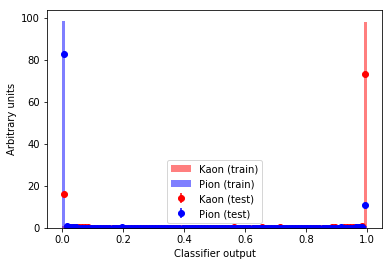

In [0]:
###################  Evaluation  #################

# Evaluate performance by comparing test and training classifier response
decisions = []
for (X,y) in ((data_train, target_train), (data_test, target_test)):
    d1 = 0
    d2 = 0
    if hasattr(classifier, "decision_function"):
        d1 = classifier.decision_function(X[y>0.5]).ravel()
        d2 = classifier.decision_function(X[y<0.5]).ravel()
    elif hasattr(classifier, "predict_proba"):
        d1 = classifier.predict_proba(X[y>0.5])[:,1].ravel()
        d2 = classifier.predict_proba(X[y<0.5])[:,1].ravel()
    elif hasattr(classifier, "predict"):
        d1 = classifier.predict(X[y>0.5])[:,1].ravel()
        d2 = classifier.predict(X[y<0.5])[:,1].ravel()
    decisions += [d1, d2]
#print(X)
#print(y)
#print(decisions)

bins = 100
low = min(np.min(d) for d in decisions)
high = max(np.max(d) for d in decisions)
low_high = (low,high)

plt.clf()
# Plot training decisions
plt.hist(decisions[0], color='r', alpha=0.5, range=low_high, bins=bins, histtype='stepfilled', density=True, label='Kaon (train)')
plt.hist(decisions[1], color='b', alpha=0.5, range=low_high, bins=bins, histtype='stepfilled', density=True, label='Pion (train)')

# make histogram and get error bars
hist, bins = np.histogram(decisions[2], bins=bins, range=low_high, density=True)
width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

# plot histogram for signal test sample (Kaon Test)
scale = len(decisions[2]) / sum(hist)
err = np.sqrt(hist * scale) / scale
plt.errorbar(center, hist, yerr=err, fmt='o', c='r', label='Kaon (test)')

# make and plot histogram for background test sample (Pion Test)
hist, bins = np.histogram(decisions[3], bins=bins, range=low_high, density=True)
scale = len(decisions[2]) / sum(hist)
err = np.sqrt(hist * scale) / scale
plt.errorbar(center, hist, yerr=err, fmt='o', c='b', label='Pion (test)')

plt.xlabel("Classifier output")
plt.ylabel("Arbitrary units")
plt.legend(loc='best')
plt.show()